## Zahid Nur Al Azami
### 16/394104/PA/17195

In [0]:
#import library 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [0]:
#load dataset 
colname=['x1','x2','x3','x4','iris']
iris = pd.read_csv('iris.csv',usecols = [0,1,2,3,4])
iris.columns = colname
#change class
iris['class'] = iris.iris.replace(['Iris-setosa', 'Iris-versicolor'], [0.0,1.0])


In [4]:
iris.head()

,x1,x2,x3,x4,iris,class
0,5.1,3.5,1.4,0.2,Iris-setosa,0.0
1,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,0.0


In [5]:
iris.dtypes

x1       float64
x2       float64
x3       float64
x4       float64
iris      object
class    float64
dtype: object

## Training Data Function

In [0]:

def train(iris, w, learningrate, epoch): 
  weight =w
  dtheta = [0,0,0,0,0]
  actual=[]
  predicted= []
  aktivasi = []
  accuracy = []
  e=[]
  n=0
  #looping 
  while(n<epoch):
    
    for i in range (len(iris)):
      #search the result 
      result = weight[0]*iris['x1'][i]+weight[1]*iris['x2'][i]+weight[2]*iris['x3'][i]+weight[3]*iris['x4'][i]+weight[4]
      
      #activation or sigmoid function
      activation = 1/(1+np.exp(-result))
      
      for j in range(0,len(dtheta)-1):
        dtheta[j] = 2*iris.iloc[i,j]*(iris['class'][i]-activation)*(1-activation)*activation
        
      dtheta[4] = 2*(iris['class'][i]-activation)*(1-activation)*activation
      
      #update weight
      for x in range(len(weight)): 
        weight[x] = weight[x] + learningrate * dtheta[x]

      #prediction
      if activation >= 0.5:
        prediction = 1.0
      else: 
        prediction = 0.0
  

      actual.append(iris['class'][i])
      predicted.append(prediction)
      aktivasi.append(activation)
      
      #performance measure confusion matrix
      TP,FP,TN,FN = performancemeasure(actual,predicted)
      
      #accuracy and error
      acc= (TP+TN)/(TP+FP+TN+FN)
      err = error(actual,aktivasi)
      
    n+=1
    accuracy.append(acc)
    e.append(err)
  return(weight,accuracy,e)
    


## Validation Function

In [0]:
def validasi(iris,w,learningrate,epoch):
  weight=w
  actual=[]
  predicted= []
  aktivasi = []
  accuracy = []
  e=[]
  n=0
  
  #iterasi
  while(n<epoch):
    
    for i in range (len(iris)):
      #search the result and activation or sigmoid function
      
      result = weight[0]*iris['x1'][i]+weight[1]*iris['x2'][i]+weight[2]*iris['x3'][i]+weight[3]*iris['x4'][i]+weight[4]
      activation = 1/(1+np.exp(-result))
      
      if activation >= 0.5:
        prediction = 1.0
      else: 
        prediction = 0.0
  

      actual.append(iris['class'][i])
      predicted.append(prediction)
      aktivasi.append(activation)

      TP,FP,TN,FN = performancemeasure(actual,predicted)
      
      #accuracy and error
      acc= (TP+TN)/(TP+FP+TN+FN)
      err = error(actual,aktivasi)
    n+=1
    accuracy.append(acc)
    e.append(err)
  return(accuracy,e)

## Performance Measure Confusion Matrix Function

In [0]:
def performancemeasure(actual, predicted):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(predicted)): 
        #True Positive
        if actual[i]==predicted[i]==0:
           TP += 1
        #False Positive    
        if actual[i]==1 and actual[i]!=predicted[i]:
           FP += 1
        #True Negative  
        if actual[i]==predicted[i]==1:
           TN += 1
        #False Negative  
        if actual[i]==0 and actual[i]!=predicted[i]:
           FN += 1
    return(TP, FP, TN, FN)

## Loss Function (error) Function

In [0]:

def error(actual, predicted):
	error = 0.0
	for i in range(len(actual)):
		error += 1/2*(predicted[i] - actual[i])**2
	mean = error / len(actual)
	return mean

## K-Fold Cross Validation (k= 5)

In [0]:
#5 fold, one fold 20 data

copy = iris

#crossval1 = f1+f2+f3+f4 train, f5=val
train1 = copy[0:80]
val1 = copy[80:100]

#crossval2 = f2+f3+f4+f5 train, f1=val
train2 = copy[20:100]
val2 = copy[0:20]

#crossval3 = f1+f2+f4+f5 train, f2=val
yy = copy[0:20]
xx = copy[40:100]
train3= yy.append(xx)
val3 = copy[20:40]

#crossval4 = f1+f2+f3+f5 train, f3=val
yy = copy[0:40]
xx = copy[60:100]
train4= yy.append(xx)
val4 = copy[40:60]

#crossval5 = f1+f2+f3+f5 train, f4=val
yy = copy[0:60]
xx = copy[80:100]
train5= yy.append(xx)
val5 = copy[60:80]

In [0]:
#reset index 

train1=train1.reset_index(drop=True)
val1= val1.reset_index(drop=True)
train2 = train2.reset_index(drop=True)
val2 = val2.reset_index(drop=True)
train3 = train3.reset_index(drop=True)
val3 = val3.reset_index(drop=True)
train4 = train4.reset_index(drop=True)
val4 = val4.reset_index(drop=True)
train5 = train5.reset_index(drop=True)
val5 =val5.reset_index(drop=True)

## Training and 0.1 Learning Rate Validation

In [0]:
#weight inisialization
#all training 0.5
w = [0.5,0.5,0.5,0.5,0.5]

In [0]:
#Training 5 times, epoch 300, and learning rate 0.1
w1,acc1,e1 = train(train1,w,0.1,300)
w2,acc2,e2 = train(train2,w,0.1,300)
w3,acc3,e3 = train(train3,w,0.1,300)
w4,acc4,e4 = train(train4,w,0.1,300)
w5,acc5,e5 = train(train5,w,0.1,300)

In [0]:
#Validation 5 times, epoch 300, and learning rate 0.1
vacc1,ve1 = validasi(val1,w1,0.1,300)
vacc2,ve2 = validasi(val2,w2,0.1,300)
vacc3,ve3 = validasi(val3,w3,0.1,300)
vacc4,ve4 = validasi(val4,w4,0.1,300)
vacc5,ve5 = validasi(val5,w5,0.1,300)

## Accuracy and Error from data Training and Validation 

In [22]:
#mean accuracy from training
meanacc = []
for i in range (len(acc1)):
  meanacc.append((acc1[i]+acc2[i]+acc3[i]+acc4[i]+acc5[i])/5)
print(meanacc)

#mean accuracy from validation
meanaccv=[]
for i in range (len(vacc1)):
  meanaccv.append((vacc1[i]+vacc2[i]+vacc3[i]+vacc4[i]+vacc5[i])/5)
print(meanaccv)

[0.9025000000000001, 0.94625, 0.9625, 0.9712500000000001, 0.9765, 0.9800000000000001, 0.9828571428571429, 0.985, 0.9866666666666667, 0.9879999999999999, 0.989090909090909, 0.99, 0.9907692307692308, 0.9914285714285714, 0.992, 0.9925, 0.9929411764705882, 0.9933333333333334, 0.9936842105263157, 0.994, 0.9942857142857143, 0.9945454545454545, 0.9947826086956522, 0.9949999999999999, 0.9952, 0.9953846153846154, 0.9955555555555555, 0.9957142857142858, 0.9958620689655172, 0.9960000000000001, 0.9961290322580645, 0.9962500000000001, 0.9963636363636365, 0.9964705882352941, 0.9965714285714287, 0.9966666666666667, 0.9967567567567567, 0.9968421052631579, 0.9969230769230769, 0.9969999999999999, 0.9970731707317073, 0.9971428571428571, 0.9972093023255815, 0.9972727272727273, 0.9973333333333333, 0.9973913043478261, 0.9974468085106384, 0.9974999999999999, 0.9975510204081633, 0.9975999999999999, 0.9976470588235294, 0.9976923076923077, 0.9977358490566038, 0.9977777777777778, 0.9978181818181818, 0.9978571428

In [23]:
#mean error from training
meanerror = []
for i in range (len(e1)):
  meanerror.append((e1[i]+e2[i]+e3[i]+e4[i]+e5[i])/5)
print(meanerror)

#mean error from validation
meanerrorv = []
for i in range (len(ve1)):
  meanerrorv.append((ve1[i]+ve2[i]+ve3[i]+ve4[i]+ve5[i])/5)
print(meanerrorv)

[0.0461136058894834, 0.024886998395355266, 0.017398453586085806, 0.013486794896911406, 0.01105228405190457, 0.009380950286818035, 0.008159700827385999, 0.007227350244967542, 0.006491747415165908, 0.005896133709788283, 0.005403642492701464, 0.00498933133291682, 0.00463574068938872, 0.004330285307870513, 0.004063660158532112, 0.0038288323141079843, 0.0036203833889114573, 0.0034340685028562156, 0.0032665129401367433, 0.0031149987432750543, 0.0029773115017260638, 0.0028516283368395868, 0.0027364346575381184, 0.00263046138102285, 0.002532636954673725, 0.002442050245557851, 0.002357921519587968, 0.0022795795182962188, 0.0022064431846550896, 0.0021380069709849773, 0.002073828933746335, 0.00201352101607617, 0.001956741062086595, 0.0019031862126407315, 0.001852587411170083, 0.0018047048074854174, 0.0017593238926659131, 0.0017162522326997348, 0.0016753166952659091, 0.0016363610848370452, 0.0015992441175731742, 0.0015638376803263066, 0.0015300253282737428, 0.0014977009838401665, 0.001466767806105

## Graphic Visualization

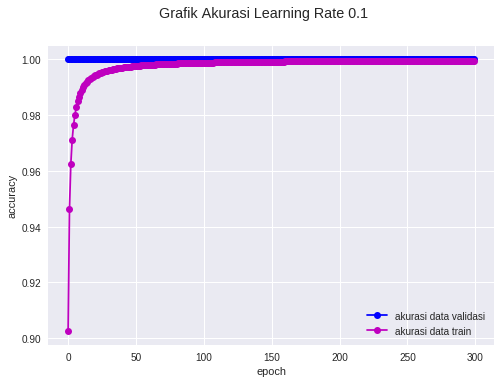

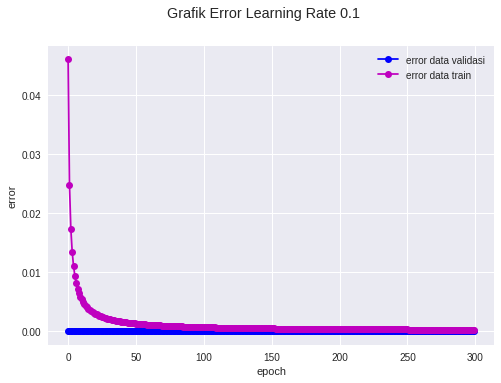

In [24]:
  #accuracy graphic
  x=plt.figure()
  plt.suptitle('Accuracy Graphic Learning Rate 0.1')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.plot(meanaccv,'-ob')
  plt.plot(meanacc,'-om')
  plt.gca().legend(('accuracy of data validation','accuracy of data train'))
  y=plt.figure()
  
  #error graphic
  y.suptitle('Error Graphic Learning Rate 0.1')
  plt.xlabel('epoch')
  plt.ylabel('error')
  plt.plot(meanerrorv,'-ob')
  plt.plot(meanerror,'-om')  
  plt.gca().legend(('error of data validation','error of data train'))

## Training and 0.8 Learning Rate Validation

In [0]:

#weight inisialization
#all training 0.5
w = [0.5,0.5,0.5,0.5,0.5]

In [0]:
#Training 5 times, epoch 300, and learning rate 0.1
w1,acc1,e1 = train(train1,w,0.8,300)
w2,acc2,e2 = train(train2,w,0.8,300)
w3,acc3,e3 = train(train3,w,0.8,300)
w4,acc4,e4 = train(train4,w,0.8,300)
w5,acc5,e5 = train(train5,w,0.8,300)

In [0]:
#Validation 5 times, epoch 300, and learning rate 0.1
vacc1,ve1 = validasi(val1,w1,0.8,300)
vacc2,ve2 = validasi(val2,w2,0.8,300)
vacc3,ve3 = validasi(val3,w3,0.8,300)
vacc4,ve4 = validasi(val4,w4,0.8,300)
vacc5,ve5 = validasi(val5,w5,0.8,300)

## Accuracy and Error from data Training and Validation 

In [28]:
#mean accuracy from training 
meanacc = []
for i in range (len(acc1)):
  meanacc.append((acc1[i]+acc2[i]+acc3[i]+acc4[i]+acc5[i])/5)
print(meanacc)

#mean accuracy from validation
meanaccv=[]
for i in range (len(vacc1)):
  meanaccv.append((vacc1[i]+vacc2[i]+vacc3[i]+vacc4[i]+vacc5[i])/5)
print(meanaccv)

[0.9650000000000001, 0.9637499999999999, 0.9733333333333334, 0.978125, 0.9824999999999999, 0.985, 0.9860714285714286, 0.9878125000000001, 0.9891666666666665, 0.99025, 0.9911363636363635, 0.991875, 0.9925, 0.9930357142857144, 0.9935, 0.99390625, 0.9942647058823528, 0.9945833333333333, 0.9948684210526316, 0.995125, 0.9953571428571429, 0.9955681818181817, 0.9957608695652173, 0.9959374999999999, 0.9961, 0.9962500000000001, 0.9963888888888889, 0.9965178571428572, 0.9966379310344827, 0.9967500000000001, 0.9968548387096774, 0.9969531249999999, 0.9970454545454546, 0.9971323529411766, 0.9972142857142856, 0.9972916666666667, 0.9973648648648649, 0.9974342105263159, 0.9974999999999999, 0.9975625000000001, 0.9976219512195122, 0.9976785714285714, 0.9977325581395349, 0.9977840909090908, 0.9978333333333333, 0.9978804347826088, 0.9979255319148936, 0.9979687500000001, 0.9980102040816327, 0.9980499999999999, 0.9980882352941176, 0.9981249999999999, 0.9981603773584906, 0.9981944444444444, 0.998227272727272

In [29]:
#mean error from training
meanerror = []
for i in range (len(e1)):
  meanerror.append((e1[i]+e2[i]+e3[i]+e4[i]+e5[i])/5)
print(meanerror)

#mean error from validation
meanerrorv = []
for i in range (len(ve1)):
  meanerrorv.append((ve1[i]+ve2[i]+ve3[i]+ve4[i]+ve5[i])/5)
print(meanerrorv)

[0.01627024590886398, 0.017037970544914, 0.012381970407691808, 0.010064236988756876, 0.00810703918776528, 0.0068573380790506065, 0.006302262647911569, 0.00551770643713742, 0.004906468633815362, 0.004417358119592029, 0.004017134473388135, 0.003683588761746733, 0.0034013374667793616, 0.0031593904812625244, 0.00294968785629504, 0.002766184445527414, 0.002604257409623066, 0.002460311161205966, 0.002331507046545176, 0.0022155741171227803, 0.00211067396452037, 0.002015302417757915, 0.0019282168844540482, 0.0018483818564990324, 0.0017749274942345087, 0.0017071177680311887, 0.0016443256794362415, 0.001586013792008201, 0.001531718790198183, 0.0014810391264057966, 0.0014336250588847998, 0.0013891705575041174, 0.0013474066811559051, 0.001308096123827457, 0.001271028695606722, 0.00123601755683101, 0.0012028960628942837, 0.0011715151072249853, 0.0011417408730206794, 0.0011134529222083709, 0.0010865425640565571, 0.0010609114568314152, 0.0010364704045606045, 0.00101313831786565, 0.0009908413133418441

## Graphic Visualization

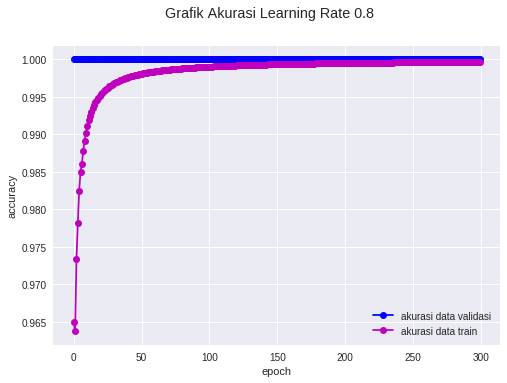

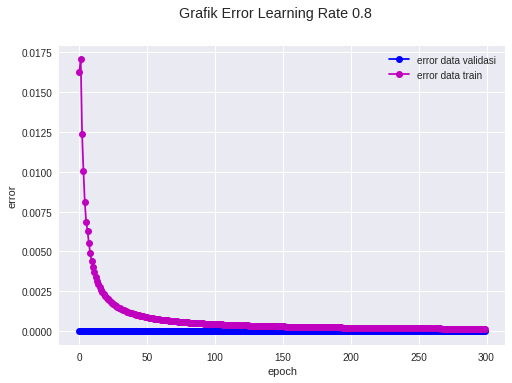

In [30]:
  #accuracy graphic
  x=plt.figure()
  plt.suptitle('Accuracy Graphic Learning Rate 0.8')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.plot(meanaccv,'-ob')
  plt.plot(meanacc,'-om')
  plt.gca().legend(('accuracy of data validation','accuracy of data train'))
  y=plt.figure()
  
  #error graphic 
  y.suptitle('Error Graphic Learning Rate 0.8')
  plt.xlabel('epoch')
  plt.ylabel('error')
  plt.plot(meanerrorv,'-ob')
  plt.plot(meanerror,'-om')  
  plt.gca().legend(('error of data validation','error of data train'))